# Basic Image Processing

## Installs

In [28]:
# Uncomment this 
# ! pip install opencv-python
# ! pip install matplotlib
# ! pip install dicom
# ! pip install --upgrade scikit-image

## Basic Image Processing

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

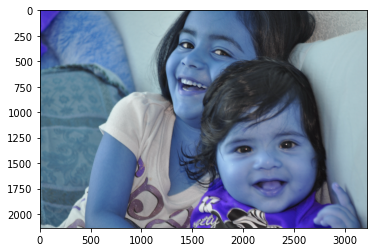

In [30]:
# Load an color image in grayscale
img = cv2.imread('/Users/taposh/PycharmProjects/notes-med-image-proc/chp-2/DSC_0848.jpg')
plt.imshow(img)
plt.show()

## Basic Face Detection

[[1688  915 1092 1092]]


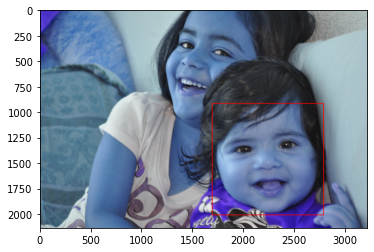

In [31]:
#A very basic Face Detection
face_cascade = cv2.CascadeClassifier('/Users/taposh/PycharmProjects/notes-med-image-proc/chp-2/haarcascade_frontalface_alt.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
plt.imshow(img)
plt.show()

## Basics of DICOM 

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dicom as pdicom
import os
import glob

%matplotlib inline
#Other packages needed for analysis
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

#Download dicom images
INPUT_FOLDER = '/Users/taposh/Downloads/dicom_Images/uncompressed/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

#Collect all dicom images
lstFilesDCM = []  # create an empty list
def load_scan2(path):
    for dirName, subdirList, fileList in os.walk(path):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM.append(os.path.join(dirName,filename))
                #print(lstFilesDCM)
    return lstFilesDCM
    
first_patient = load_scan2(INPUT_FOLDER)
#print(first_patient)
# Get ref file
RefDs = pdicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), 
                     float(RefDs.SliceThickness))

x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'

ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pdicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  

ImportError: cannot import name 'img_as_float32'

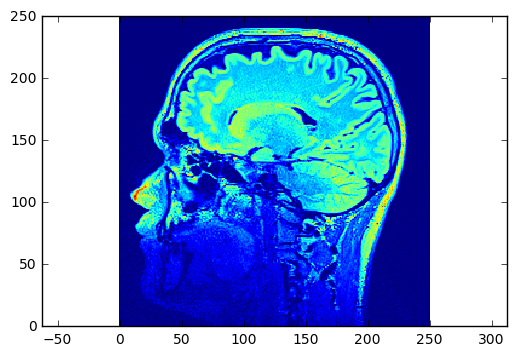

In [7]:
#Lets plot this
plt.figure(dpi=1600)
plt.axes().set_aspect('equal', 'datalim')
#plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 100]))


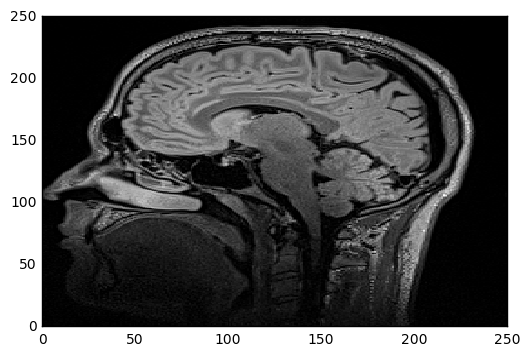

In [51]:
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 80]))

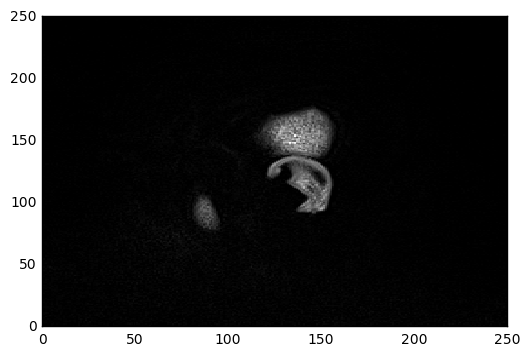

In [52]:
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 10]))

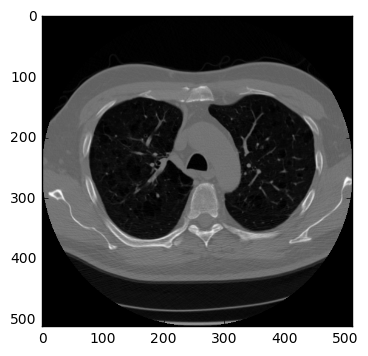

In [70]:
# Any results you write to the current directory are saved as output.
lung = dicom.read_file('/Users/taposh/workspace/lung_cancer/dsbowl2017/data/sample_images/0a0c32c9e08cc2ea76a71649de56be6d/0a67f9edb4915467ac16a565955898d3.dcm')

slice = lung.pixel_array
slice[slice == -2000] = 0
plt.imshow(slice, cmap=plt.cm.gray)


In [72]:
dataset = dicom.read_file('/Users/taposh/workspace/lung_cancer/dsbowl2017/data/sample_images/0a0c32c9e08cc2ea76a71649de56be6d/0a67f9edb4915467ac16a565955898d3.dcm')
im=RefDs.pixel_array

thresh1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
plt.imshow(eval(thresh[i]),'gray')
#ret,thresh2 = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
#ret,thresh3 = cv2.threshold(im,127,255,cv2.THRESH_TRUNC)
#ret,thresh4 = cv2.threshold(im,127,255,cv2.THRESH_TOZERO)
#ret,thresh5 = cv2.threshold(im,127,255,cv2.THRESH_TOZERO_INV)
     
#thresh = ['im','thresh1','thresh2','thresh3','thresh4','thresh5']
 
#for i in range(6):
#    plt.subplot(2,3,i+1),plt.imshow(eval(thresh[i]),'gray')
#    plt.title(thresh[i])
 
plt.show()

error: /Users/jenkins/miniconda/1/x64/conda-bld/work/opencv-3.1.0/modules/imgproc/src/thresh.cpp:1273: error: (-210)  in function threshold


## Analyzing Dicom Files

Now, that we look into the lung cancer data-set from Kaggle

In [38]:
#View the sample lung cancer Image
INPUT_FOLDER = '/Users/taposh/workspace/lung_cancer/dsbowl2017/data/sample_images/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

In [60]:
# Load the scans in given folder path
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [61]:
# Hounsfield units (HU)
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

In [62]:
first_patient = load_scan(INPUT_FOLDER + patients[0])
first_patient

[(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.247817952625791837963403492891187883824
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0020) Patient ID                          LO: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0050) Slice Thickness                     DS: '2.5'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.86208730140539712382771890501772734277950692397709007305473
(0020, 000e) Series Instance UID                 UI: 2.25.11575877329635228925808596800269974740893519451784626046614
(0020, 0011) Series Number              

limit_output extension: Maximum message size of 10000 exceeded with 343352 characters

In [63]:
first_patient_pixels = get_pixels_hu(first_patient)

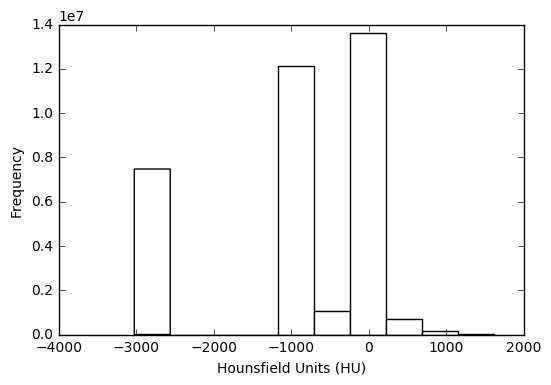

In [64]:
plt.hist(first_patient_pixels.flatten(), bins=10, color='white')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

## Lung Cancer Data

In [85]:
# Please check excellent notebook of Guido Zuidhof for full explanation of this code
%matplotlib inline
import sys
import numpy as np
from numpy import *
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import *
import glob
from sklearn.model_selection import train_test_split
import datetime
import math
import os.path
from importlib import reload
import matplotlib.pyplot as plt
from IPython.display import display
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from multiprocessing import Pool
import time
from skimage import measure, morphology, segmentation
import scipy.ndimage as ndimage
import dicom

import keras
from keras.layers.core import *
from keras.layers.normalization import *
from keras.layers.pooling import *
from keras.layers import Input
from keras.layers.convolutional import *
from keras.regularizers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.models import Model, Sequential
from keras.models import load_model
import tensorflow as t

Using Theano backend.


In [86]:
#View the sample Images
# Some constants 
INPUT_FOLDER = '/Users/taposh/workspace/lung_cancer/dsbowl2017/data/sample_images/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

OUTPUT_FOLDER = '/Users/taposh/workspace/lung_cancer/dsbowl2017/data/'

THRESHOLD_HIGH = 700
THRESHOLD_LOW = -1100

# fix random seed for reproducibility
np.random.seed(17)



----Loaded Scan and Converted to HU units----
Shape:  (4, 512, 512)


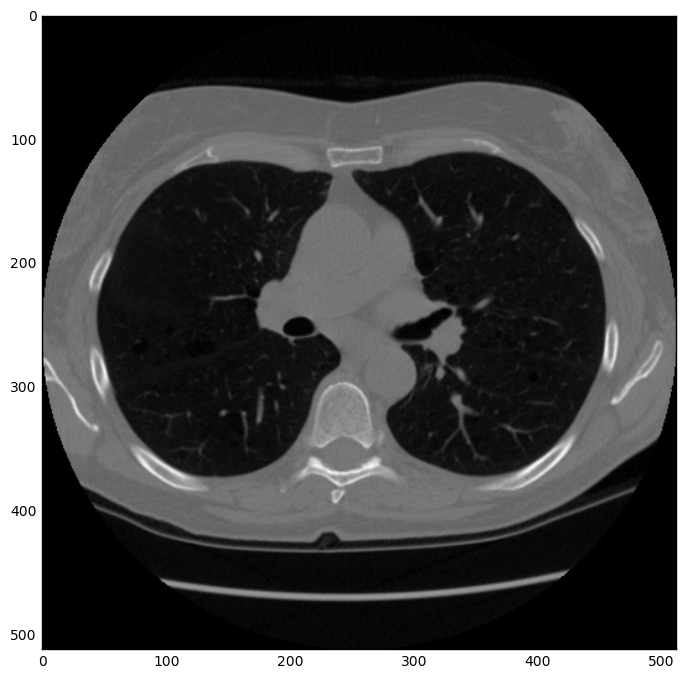

----Segmented Lung and Padded/Trimmed to have 256 slices----
Shape:  (256, 512, 512)


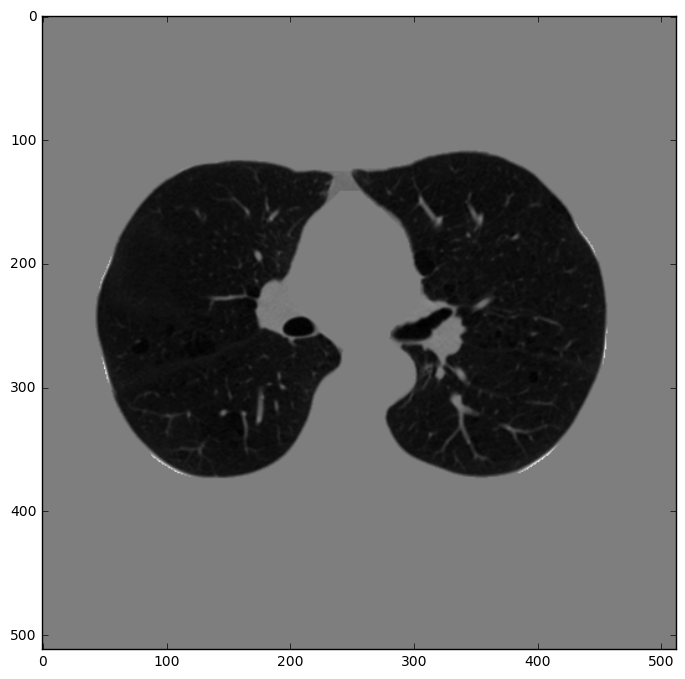

----Thresholded and Normalized----
Shape:  (256, 512, 512)


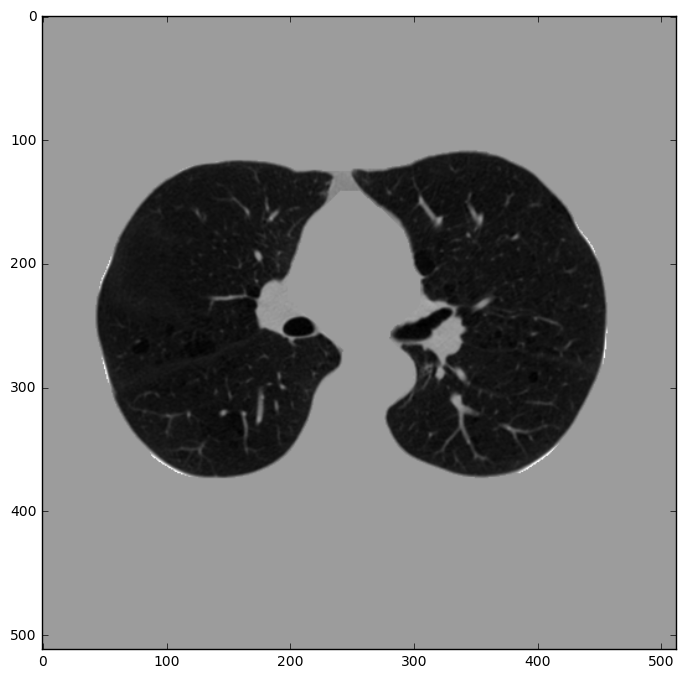

----Expanded dimensions for color channel representation ----
Shape:  (256, 512, 512, 1)


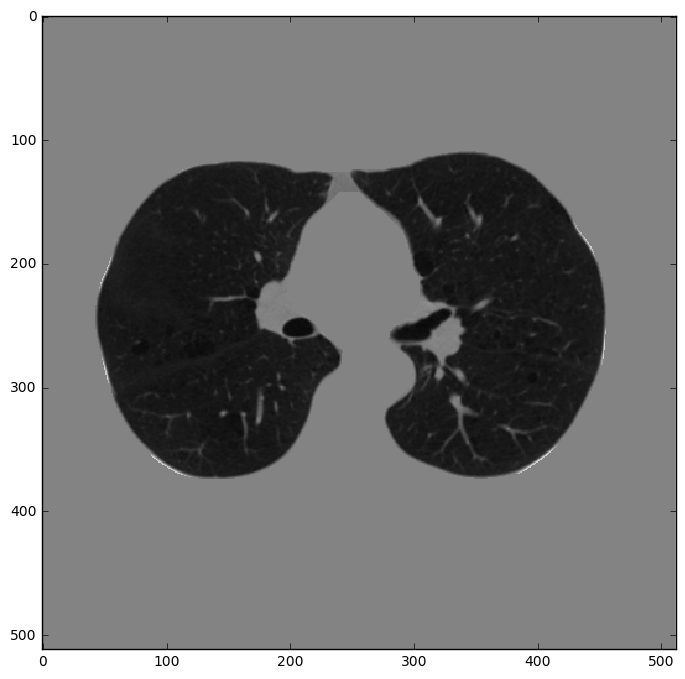

In [89]:


# Simple Function to show the slice at full resolustion normal imshow would downscale this image.
# It can accept either (image_width, image_height) array or (image_width, image_height, 1) numpy as input.
# Optional Value range is a tuple of fixed max value and min value. This is useful if you do not want color 
#  to change between different scan slices.

def show_slice(arr, value_range = None):
    if len (list(arr.shape)) > 2:
        arr2 = arr.copy()
        arr2 = np.reshape (arr, (arr.shape[0],arr.shape[1]))
    else:
        arr2 = arr
    dpi = 80
    margin = 0.01 # (5% of the width/height of the figure...)
    xpixels, ypixels = arr2.shape[0], arr2.shape[1]

    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    if value_range is None:
        plt.imshow(arr2, cmap=plt.cm.gray)
    else:        
        ax.imshow(arr2, vmin=value_range[0], vmax=1, cmap=plt.cm.gray, interpolation='none')
    plt.show()

def preprocess_all_scans_mp (in_folder, out_folder, demo=False):

    dicom_folder_list = [ name for name in os.listdir(in_folder) if os.path.isdir(os.path.join(in_folder, name)) ]
   
    # For Testing feed just load one scan
    segment_pad_and_save_ct_scan_as_npz  (dicom_folder_list[0], demo=True)
    
    if not demo:
        # Multi-threaded processes to utilize all available CPUs for this task. Note that many threads will block on IO
        # so creating more than number of CPUs.    
        thread_pool = Pool(32)
        thread_pool.map (segment_pad_and_save_ct_scan_as_npz, dicom_folder_list)
        
        # Cleanup
        thread_pool.close()
        thread_pool.join_thread()
        
def segment_pad_and_save_ct_scan_as_npz (scanid, demo=False):
    
    scan_dir = INPUT_FOLDER + str(scanid)
    
    scan = load_scan_as_HU_nparray(scan_dir)
    
    # For demo reduce number of slices to 5 to save time
    if demo:
        scan = scan[78:82]
    
    if demo:
        print ("----Loaded Scan and Converted to HU units----")
        print ("Shape: ", scan.shape)
        show_slice (scan[3])
    
    scan = seperate_lungs_and_pad (scan)
    
    if demo:
        print ("----Segmented Lung and Padded/Trimmed to have 256 slices----")
        print ("Shape: ", scan.shape)
        show_slice (scan[3])
        
    scan = threshold_and_normalize_scan (scan)
    
    if demo:
        print ("----Thresholded and Normalized----")
        print ("Shape: ", scan.shape)
        show_slice (scan[3]) 
    
    # For Convnet we will need one extra dimension representing color channel
    scan = scan.reshape((256,512,512,1))
    
    if demo:
        print ("----Expanded dimensions for color channel representation ----")
        print ("Shape: ", scan.shape)
        show_slice (scan[3], value_range=(-1,1))         
    
    # Save output file to compressed npz file for easy reading.
    if not demo:
        out_file = OUTPUT_FOLDER + 'stage1/' + scanid + '.npz'    
        np.savez_compressed (out_file, scan)
    
# Load the scans in given folder path

def load_scan_as_HU_nparray(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
    
    image = np.stack([s.pixel_array for s in slices])
    
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    image[image == -2000] = 0
    
    # Convert to Hounsfield units (HU)
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)        


def seperate_lungs_and_pad(scan):
    
    # make total 256 slices fill in -1100 as exterme value 
    segmented_scan = np.full ((256, 512, 512), THRESHOLD_LOW)
    
    for i, image in enumerate (scan):
        
        # Ignore all slices later than 255 if required.
        if (i == 256):
            break
        
        # Creation of the internal Marker
        marker_internal = image < -400
        marker_internal = segmentation.clear_border(marker_internal)
        marker_internal_labels = measure.label(marker_internal)
        areas = [r.area for r in measure.regionprops(marker_internal_labels)]
        areas.sort()
        if len(areas) > 2:
            for region in measure.regionprops(marker_internal_labels):
                if region.area < areas[-2]:
                    for coordinates in region.coords:                
                           marker_internal_labels[coordinates[0], coordinates[1]] = 0
        marker_internal = marker_internal_labels > 0
        #Creation of the external Marker
        external_a = ndimage.binary_dilation(marker_internal, iterations=10)
        external_b = ndimage.binary_dilation(marker_internal, iterations=55)
        marker_external = external_b ^ external_a
        #Creation of the Watershed Marker matrix
        marker_watershed = np.zeros((512, 512), dtype=np.int)
        marker_watershed += marker_internal * 255
        marker_watershed += marker_external * 128

        #Creation of the Sobel-Gradient
        sobel_filtered_dx = ndimage.sobel(image, 1)
        sobel_filtered_dy = ndimage.sobel(image, 0)
        sobel_gradient = np.hypot(sobel_filtered_dx, sobel_filtered_dy)
        sobel_gradient *= 255.0 / np.max(sobel_gradient)

        #Watershed algorithm
        watershed = morphology.watershed(sobel_gradient, marker_watershed)

        #Reducing the image created by the Watershed algorithm to its outline
        outline = ndimage.morphological_gradient(watershed, size=(3,3))
        outline = outline.astype(bool)

        #Performing Black-Tophat Morphology for reinclusion
        #Creation of the disk-kernel and increasing its size a bit
        blackhat_struct = [[0, 0, 1, 1, 1, 0, 0],
                           [0, 1, 1, 1, 1, 1, 0],
                           [1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1],
                           [0, 1, 1, 1, 1, 1, 0],
                           [0, 0, 1, 1, 1, 0, 0]]
        blackhat_struct = ndimage.iterate_structure(blackhat_struct, 8)
        #Perform the Black-Hat
        outline += ndimage.black_tophat(outline, structure=blackhat_struct)

        #Use the internal marker and the Outline that was just created to generate the lungfilter
        lungfilter = np.bitwise_or(marker_internal, outline)
        #Close holes in the lungfilter
        #fill_holes is not used here, since in some slices the heart would be reincluded by accident
        lungfilter = ndimage.morphology.binary_closing(lungfilter, structure=np.ones((5,5)), iterations=3)

        #Apply the lungfilter (note the filtered areas being assigned 30 HU)
        segmented_scan[i] = np.where(lungfilter == 1, image, 30*np.ones((512, 512)))
        
    return segmented_scan

def threshold_and_normalize_scan (scan):
    scan = scan.astype(np.float32)
    scan [scan < THRESHOLD_LOW] = THRESHOLD_LOW
    scan [scan > THRESHOLD_HIGH] = THRESHOLD_HIGH
    
    # Maximum absolute value of any pixel .
    max_abs = abs (max(THRESHOLD_LOW, THRESHOLD_HIGH, key=abs))
    
    # This will bring values between -1 and 1
    scan /= max_abs
    
    return scan

if OUTPUT_FOLDER:
    os.makedirs (OUTPUT_FOLDER+'stage1_results/', exist_ok=True)
    
# For full preprocessing you should to set demo=False
preprocess_all_scans_mp (INPUT_FOLDER, OUTPUT_FOLDER, demo=False)